In [54]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#connects plotly to pandas

import cufflinks as cf
#make plotly work in your Notewook

from plotly.offline import download_plotlyjs,init_notebook_mode
, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()

In [55]:
#uploading data
df_1=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [56]:
#loading Data
df_1


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

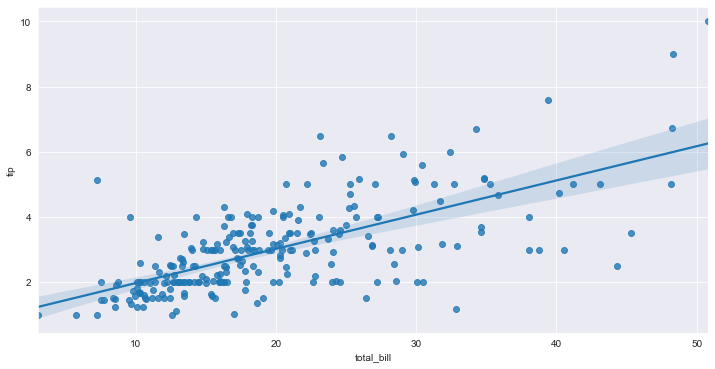

In [57]:
#ploting data with regression line
plt.figure(figsize=(12,6))
sns.regplot(x='total_bill',y='tip',data=df_1)


In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [ ]:
#uploading weather data
df_2=pd.read_csv('https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/PittsburghWeather.csv',index_col='Date',parse_dates=True)

In [ ]:
#loading data
df_2

In [ ]:
#dropping columns
df_2=df_2.drop(['tmin','prcp'],axis=1)

In [ ]:
#loadig data
df_2

In [20]:
#getting data with greater than 
df_2=df_2[df_2.index>'2010-01-01']
df_2
#freqency is day
df_2=df_2.asfreq('d')
df_2.index

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
               '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09',
               '2010-01-10', '2010-01-11',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=3651, freq='D')

In [21]:
#Arima Model
#AutoRegressive Integrated Moving Average
#Great with Clear Trend and Seasonality
#SARIMA
#AR:Autoregressions
#I: Integrated
#MA: Moving Average
df_2.isnull().values.any()

False

In [22]:
#checking the null values
df_2.isnull().values.any()

False

In [23]:
#removing the null values
df_2=df_2.fillna(method='ffill')


In [24]:
#checkin the null values
df_2.isnull().values.any()

False

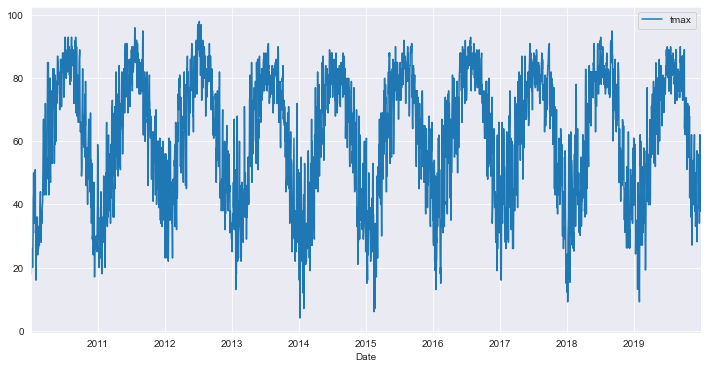

In [25]:
#ploting the graph
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(12,6))
fig,ax=plt.subplots()
ax=df_2.plot(ax=ax)

In [49]:
model=AutoReg(df_2['tmax'],30)
model_fit=model.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [50]:
#getting length of the data
len(df_2)

3651

In [51]:
train_df=df_2.iloc[:2920]
test_df=df_2.iloc[2920:]



In [52]:
train_model=AutoReg(train_df['tmax'],730).fit()
start=len(train_df)
end=len(train_df)+len(test_df)-1
prediction=train_model.predict(start=start, end=end,dynamic=True)
ax=test_df.plot(ax=ax)
ax=prediction.plot(ax=ax)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [53]:
start=len(train_df)
end=len(train_df)+len(test_df)-1
prediction=train_model.predict(start=start,end=end,dynamic=True)
ax=test_df.plot(ax=ax)
ax=prediction.plot(ax=ax)